# Import modules

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Prepare dictionary for later
value_dict = {
    'twitter_positive':0,
    'twitter_neutral':0,
    'twitter_negative':0,
    'instagram_positive':0,
    'instagram_neutral':0,
    'instagram_negative':0,
}

# Read Twitter sentiment values

In [43]:
df = pd.read_csv('trump_impeachment_all_countries_processed.csv')
df.head()

,Unnamed: 0,comment_id,user_id,platform,date_time,likes_count,comment_raw,comment_cleaned_emoji,comment_cleaned_no_emoji,comment_processed,vader_compound_emoji,vader_compound_no_emoji
0,0,1361827317136445442,1.103705e+18,twitter,2021-02-17 07:58:28,0.0,Will not being convicted end up spurring more ...,Will not being convicted end up spurring more ...,Will not being convicted end up spurring more ...,"['convicted', 'end', 'spurring', 'less', 'acti...",0.4404,0.4404
1,1,1361827186399793152,5.616902e+08,twitter,2021-02-17 07:57:57,0.0,"Trump Impeachment Attorney SLAMS News Anchor, ...","Trump Impeachment Attorney SLAMS News Anchor, ...","Trump Impeachment Attorney SLAMS News Anchor, ...","['attorney', 'slams', 'news', 'anchor', 'gets'...",0.0000,0.0000
2,2,1361826976781197317,1.103705e+18,twitter,2021-02-17 07:57:07,0.0,@MichaelCohen212 @RudyGiuliani @POTUS45 @GOP W...,Will not being convicted end up spurring m...,Will not being convicted end up spurring m...,"['convicted', 'end', 'spurring', 'less', 'acti...",0.4404,0.4404
3,3,1361826947316219908,1.103705e+18,twitter,2021-02-17 07:57:00,0.0,@DrJasonJohnson Will not being convicted end u...,Will not being convicted end up spurring more...,Will not being convicted end up spurring more...,"['convicted', 'end', 'spurring', 'less', 'acti...",0.4404,0.4404
4,4,1361826793091719171,1.103705e+18,twitter,2021-02-17 07:56:23,0.0,@davidplouffe Will not being convicted end up ...,Will not being convicted end up spurring more...,Will not being convicted end up spurring more...,"['convicted', 'end', 'spurring', 'less', 'acti...",0.4404,0.4404


In [44]:
for value in df['vader_compound_emoji']:
    if value >= 0.05: 
        value_dict['twitter_positive'] += 1
    elif value <= -0.05: 
        value_dict['twitter_negative'] += 1
    else: 
        value_dict['twitter_neutral'] += 1
print(value_dict)

{'twitter_positive': 27824, 'twitter_neutral': 414988, 'twitter_negative': 35803, 'instagram_positive': 0, 'instagram_neutral': 0, 'instagram_negative': 0}


# Read Instagram sentiment values

In [45]:
df2 = pd.read_csv('instagram_comments_processed.csv')
df2.head()

,Unnamed: 0,comment_id,user_id,platform,date_time,likes_count,comment_raw,comment_cleaned_emoji,comment_cleaned_no_emoji,comment_processed,vader_score_emoji,vader_score_no_emoji
0,0,17916024808583798,3544668418,instagram,2021-02-19 00:52:00,1,Well stated!,Well stated!,Well stated!,"['well', 'stated']",0.3382,0.3382
1,1,17874135509220349,30746756357,instagram,2021-02-16 01:55:25,1,😂😂👏,😂😂👏,NaN,[],0.7003,0.0000
2,2,17891163556905576,10563354725,instagram,2021-02-12 00:05:16,1,The hand makes it sublime,The hand makes it sublime,The hand makes it sublime,"['hand', 'makes', 'sublime']",0.4939,0.4939
3,3,18126510583195827,10563354725,instagram,2021-02-12 00:04:00,1,Missed this one b4 and the band aid too. Too good,Missed this one b4 and the band aid too. Too good,Missed this one b4 and the band aid too. Too good,"['missed', 'band', 'aid', 'good']",0.1779,0.1779
4,4,17912957488603721,9704226,instagram,2021-02-03 22:33:08,1,😜😜😜perfect❣️,😜😜😜perfect❣️,perfect,[],0.6369,0.5719


In [47]:
for value in df2['vader_compound_emoji']:
    if value >= 0.05: 
        value_dict['instagram_positive'] += 1
    elif value <= -0.05: 
        value_dict['instagram_negative'] += 1
    else: 
        value_dict['instagram_neutral'] += 1
print(value_dict)

{'twitter_positive': 27824, 'twitter_neutral': 414988, 'twitter_negative': 35803, 'instagram_positive': 314, 'instagram_neutral': 245, 'instagram_negative': 208}


# Create bar graph

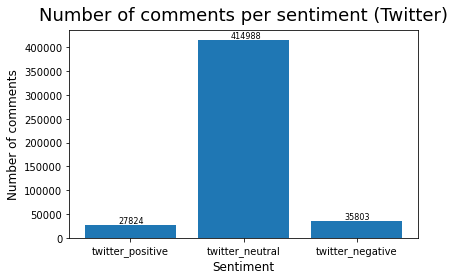

In [138]:
# Twitter
plt.bar(range(3), [value_dict['twitter_positive'], value_dict['twitter_neutral'], value_dict['twitter_negative']])
plt.xticks(range(3), ['twitter_positive', 'twitter_neutral', 'twitter_negative'])
plt.title("Number of comments per sentiment (Twitter)", fontsize = 18, pad=10)
plt.xlabel("Sentiment", fontsize = 12)
plt.ylabel("Number of comments",fontsize = 12)
num_comments_list = list(value_dict.values())
for i in range(3):
    plt.text(x=i-0.11 , y = num_comments_list[i]+3400 , s=f"{num_comments_list[i]}" , fontdict=dict(fontsize=8))

# plt.savefig('Number of comments per sentiment (Twitter).png')
plt.tight_layout()
plt.show()

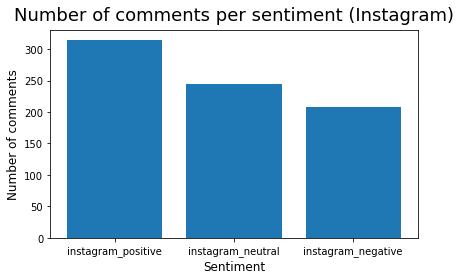

In [99]:
# Instagram
plt.bar(range(3), [value_dict['instagram_positive'], value_dict['instagram_neutral'], value_dict['instagram_negative']])
plt.xticks(range(3), ['instagram_positive', 'instagram_neutral', 'instagram_negative'])
plt.title("Number of comments per sentiment (Instagram)", fontsize = 18, pad=10)
plt.xlabel("Sentiment", fontsize = 12)
plt.ylabel("Number of comments",fontsize = 12)
# plt.savefig('Number of comments per sentiment (Twitter).png')
plt.tight_layout()
plt.show()

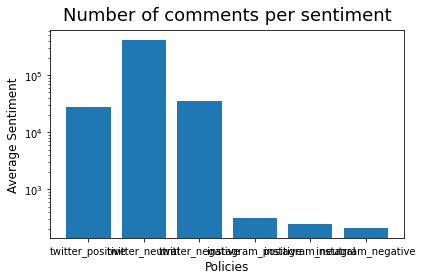

In [98]:
# All
plt.bar(range(len(value_dict)), list(value_dict.values()), log=True)
plt.xticks(range(len(value_dict)), list(value_dict.keys()))
plt.title("Number of comments per sentiment", fontsize = 18, pad=10)
plt.xlabel("Policies", fontsize = 12)
plt.ylabel("Average Sentiment",fontsize = 12)
# plt.savefig('bar_chart.png')
plt.tight_layout()
plt.show()

<AxesSubplot:>

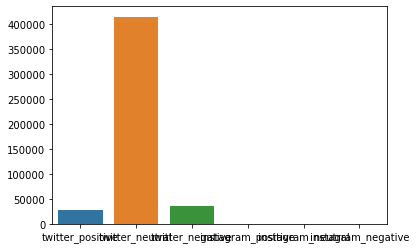

In [64]:
sns.barplot(list(value_dict.keys()), list(value_dict.values()))